
<div style="border:solid green 2px; padding: 20px">

👋 **Hello! I'm Dot, your AI reviewer.**

I've completed the first pass of your code review. Below, you'll find my comments and suggestions for improvement.

**What should you do next?**

1. **Review:** check my comments in the notebook below.
2. **Decide:**
* **Agree with the feedback?** Great! Update your code accordingly.
* **Disagree or think it's a mistake?** No problem! You can keep your code exactly as it is.


3. **Resubmit:** Send your project back. **Your next iteration will be reviewed by a human expert**, whether you made changes or not.

-------------------------------------------------------------------------------------------------------------
Please find my comments below—**I kindly ask that you do not move, modify, or delete them**.

You can find my comments highlighted in green, yellow, or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections.
</div>



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello KARINA,

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/1949959f
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v1:` section.


If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please remove the bracketed instructional comments (text in [ ... ]) before submitting — those were meant to be deleted.<br>
</div>

The goal of this project is to determine which Megaline prepaid plan — Surf or Ultimate — generates more revenue for the company. The commercial department will use this information to make data-driven decisions about how to allocate the advertising budget. To achieve this goal, I will analyze usage data from a sample of 500 Megaline clients for the year 2018. The analysis will include calls, text messages, and internet usage, taking into account Megaline’s billing rules for rounding minutes and data. I will prepare and clean the data, calculate monthly usage and revenue for each user, and compare customer behavior across the two plans using descriptive statistics and visualizations. Finally, I will test statistical hypotheses to determine whether the differences in average revenue between plans — and between users in the NY-NJ area and other regions — are statistically significant. Based on the results, I will draw conclusions and provide recommendations supported by the data.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

for name, df in {
    'calls': calls,
    'internet': internet,
    'messages': messages,
    'plans': plans,
    'users': users
}.items():
    print(f'\n{name.upper()}')
    display(df.head())
    print(df.info())



CALLS


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

INTERNET


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

MESSAGES


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

PLANS


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

USERS


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


## Prepare the data

In this section, the datasets are prepared for analysis. Each table is explored individually to understand its structure, data types, and potential data quality issues. Date columns are converted to datetime format, and Megaline's billing rules for rounding call durations and internet usage are applied. Obvious inconcictencies or missing values are addressed where necessary to ensure the data is suitable for further analysis. 

## Plans

The mb_per_month_included column is measured in megabytes. Before comparing it with user data usage, values are converted to gigabytes to ensure consistent units and correct billing calculations.

In [3]:
plans['gb_per_month_included'] = plans['mb_per_month_included']/ 1024

In [4]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


In [5]:
# Print a sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


The plans dataset contains information about Megaline's prepaid plans, including monthly fees, included minutes, messages, and data allowances, as well as overage charges. All columns have appropriate data types and there are no missing values in the dataset. The data appears clean and well-structured, so no immediate issues were identified during the initial review. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You did not note that mb_per_month_included is in megabytes. Align units before using this value (convert to GB or compare in MB) — otherwise comparisons with gb_used will be incorrect and lead to wrong billing/revenue calculations.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

## Fix data

No obvious issues were identified in the plans data during the initial exploration. All values are complete and corrrectly formatted, so no data corrections were necessary at this stage.

In [6]:
# No fixes required for the plans table

## Enrich data

At this stage, no additional factors are added. Data enrichment will be performed later when monthly usage and revenue are calculated.

In [7]:
# No enrichment performed at this stage

## Users

The users dataset contains demographic and subscription related information for Megaline customers, including their plan, city, and region. The table is inspected below to verify data types, completeness and overall structure.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The Users section is missing a local inspection of the users table (users.info() and users.head()). Although users were shown earlier during data loading, please include the users DataFrame summary and a sample here for clarity and reproducibility.<br>
</div>

In [8]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

users['churn_date'].isna().sum()

466

The `reg_date` and `churn_date` columns were converted to datetime format to ensure correct
time-based operations. Missing values in `churn_date` indicate users who had not churned
by the end of the observation period, which is expected and requires no imputation.
No further data cleaning is required at this stage.

## Calls

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This cell prints calls.info() while still in the Users section. That’s misplaced — the Calls DataFrame inspection belongs in the Calls section; the Users section should inspect the users DataFrame instead.<br>
</div>

In [11]:
# Print a sample of data for users
calls.info()
calls.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

No data fixes were applied to the users table here: reg_date and churn_date were not converted to datetime and churn_date missing values were not examined/handled. Convert the date columns and check churn_date before further aggregation.<br>
</div>

The calls dataset contains information about individual calls, including call dates,
durations, and user identifiers. The `call_date` column was converted to datetime format
to enable correct time-based aggregation and analysis. No missing values were identified,
and the dataset structure is suitable for further processing.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The markdown claims call_date is stored as a datetime, but the DataFrame info printed earlier shows call_date as object. This is inconsistent and can break time-based operations — convert the column to datetime before aggregating or relying on date methods.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

### Fix Data

According to Megaline's billing rules, each individual call is rounded up to the nearest minute. Therefore, call durations must be rounded up before aggregating monthly usage to ensure accurate billing calculations.

In [12]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

### Enrich Data

No additional features are added to the calls data at this stage. Data enrichment will be performed later when monthly usage and revenue are calculated.

In [13]:
# No enrichment performed at this stage

In [14]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [15]:
# Print a sample of data for calls
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


The calls dataset contains information about individual calls, including a unique call id, the call date, call duration, and the user identifier. The table structure is consistent and there are no critical missing values that would prevent analysis. The call_date column is stored as a datetime type, which will allow monthly aggregation. 

 Call durations were rounded up to whole minutes (per-call) according to Megaline's billing rules. This ensures that monthly minutes calculated later will match what customers are billed.

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame

messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [17]:
# Print a sample of data for messages
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The messages dataset contains information about text messages sent by users, including a unique message id, the message data, and the user identifier. The dataset does not contain missing values. The message_date column is stored as a datetime type, which allows aggregation by month. Overall, the data structure is clean and suitable for analysis.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The printed info shows message_date is an object (string), so the statement that it’s already a datetime is incorrect. Convert message_date to datetime before aggregating by month.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

### Fix data

message_date was stored as an object (string) and was converted to datetime to support monthky aggregation.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You noted no fixes were required, but message_date still needs conversion to datetime to support monthly aggregation. Please convert the column and re-run the checks.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

### Enrich data

No additional enrichment is performed for the messages data at this stage. Data enrichment will be handled later when monthly usage and revenue are calculated.

In [18]:
# No enrichment performed at this stage

## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [20]:
# Print a sample of data for the internet traffic
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [21]:
internet['session_date'].isna().sum()

0

The internet dataset contains information about web sessions, including the session date, the amount of data used in megabytes, and the user identifier. The dataset does not contain missing values. The session_date column is stored as a datetime type, which allows monthly aggregation. The data structure is appropriate for further analysis.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You state that session_date is stored as datetime, but the internet.info output above shows it as object. That mismatch needs fixing: convert session_date to datetime and then update the description and any downstream steps that rely on it.<br>
</div>

### Fix data

According to Megaline's billing rules, individual web sessions are not rounded. Instead the total amount of data per month is rounded up to the nearest gigabyte. Therefore, no rounding is applied at the session level, and no fixes are required at this stage.

In [22]:
# No fixes required for internet data at the session level

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [23]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Plan conditions are printed and appear clear — this is sufficient to proceed with the monthly revenue calculations.<br>
</div>

The plans table outlines the monthly fees, included allowances, and overage charges for each plan. These conditiond will be used later to calculate monthly revenue for each user based on their usage.

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

calls_per_month = (
    calls.groupby(['user_id', 'month'])
    .agg(calls_count = ('id', 'count'))
    .reset_index()
)
display(calls_per_month.head())


,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = (
    calls.groupby(['user_id', 'month'])
    .agg(minutes_used = ('duration', 'sum'))
)
display(minutes_per_month.head())


minutes_used
user_id month              
1000    12              124
1001    8               182
        9               315
        10              393
        11              426

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

messages_per_month = (
    messages.groupby(['user_id', 'month'])
    .agg(messages_sent=('id', 'count'))
    .reset_index()
)

display(messages_per_month.head())


,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

internet_per_month = (
    internet.groupby(['user_id', 'month'])
    .agg(mb_used=('mb_used', 'sum'))
    .reset_index()
)

display(internet_per_month.head())


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
monthly_usage = calls_per_month.merge(
    minutes_per_month, on=['user_id', 'month'], how='outer'
).merge(
    messages_per_month, on=['user_id', 'month'], how='outer'
).merge(
    internet_per_month, on=['user_id', 'month'], how='outer'
)

monthly_usage = monthly_usage.fillna(0)

display(monthly_usage.head())


,user_id,month,calls_count,minutes_used,messages_sent,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job — you merged the per-user monthly aggregates into a single DataFrame and handled missing values with fillna(0). This block is complete. You can run monthly_usage.info() and monthly_usage.head() to quickly verify column types and contents.<br>
</div>

In [29]:
# Add the plan information
monthly_usage = monthly_usage.merge(
    users[['user_id', 'plan', 'city']],
    on='user_id',
    how='left'
)

display(monthly_usage.head())


,user_id,month,calls_count,minutes_used,messages_sent,mb_used,plan,city
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [30]:
monthly_usage.columns

Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_sent',
       'mb_used', 'plan', 'city'],
      dtype='object')

In [31]:

monthly_usage = monthly_usage.merge(
    plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)
monthly_usage.columns



Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_sent',
       'mb_used', 'plan', 'city', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_per_month_included'],
      dtype='object')

In [32]:
monthly_usage.columns

Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_sent',
       'mb_used', 'plan', 'city', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_per_month_included'],
      dtype='object')

In [33]:
monthly_usage['gb_used'] = np.ceil(monthly_usage['mb_used'] / 1024)

In [34]:
[c for c in monthly_usage.columns if 'included' in c or 'mb_per' in c or 'gb_per' in c]

['messages_included',
 'mb_per_month_included',
 'minutes_included',
 'gb_per_month_included']

In [35]:
monthly_usage['gb_per_month_included'] = monthly_usage['mb_per_month_included']/ 1024

In [36]:
monthly_usage['extra_minutes'] = np.maximum(
    monthly_usage['minutes_used'] - monthly_usage['minutes_included'], 0
)

monthly_usage['extra_messages'] = np.maximum(
    monthly_usage['messages_sent'] - monthly_usage['messages_included'], 0
)

monthly_usage['extra_gb'] = np.maximum(
    monthly_usage['gb_used'] - monthly_usage['gb_per_month_included'], 0
)



<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The extra_gb calculation subtracts the plan's MB allowance from a GB value (unit mismatch). This produces incorrect extra_gb values — fix the units before computing extra_gb.<br><br>Extra GB calculation is incorrect: you're subtracting mb_per_month_included (in MB) from gb_used (in GB). This makes extra_gb zero for most users and underestimates data charges.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

In [37]:
# Calculate the monthly revenue for each user
monthly_usage['revenue'] = (
    monthly_usage['usd_monthly_pay']
    + monthly_usage['extra_minutes'] * monthly_usage['usd_per_minute']
    + monthly_usage['extra_messages'] * monthly_usage['usd_per_message']
    + monthly_usage['extra_gb'] * monthly_usage['usd_per_gb']
)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Revenue uses extra_gb, which is currently incorrect due to the unit mismatch, so data overage charges are not being calculated properly. Recompute extra_gb with matching units and then recalculate revenue.<br><br>The revenue calculation is affected by the incorrect extra_gb values, so reported revenues (especially data overage) are likely underestimated. Fix extra_gb first and then recompute revenue.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

In [38]:
monthly_usage[['user_id', 'month', 'plan', 'revenue']].head()

,user_id,month,plan,revenue
0,1000,12,ultimate,70.00
1,1001,8,surf,20.00
2,1001,9,surf,20.00
3,1001,10,surf,90.09
4,1001,11,surf,60.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [39]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls_avg = (
    monthly_usage
    .groupby(['plan', 'month'])['minutes_used']
    .mean()
    .reset_index()
)


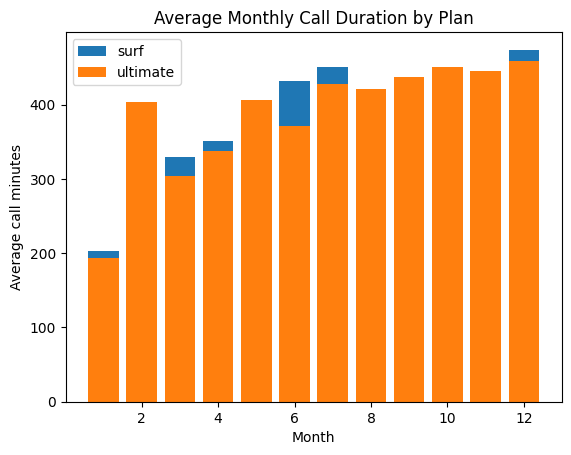

In [40]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
import matplotlib.pyplot as plt

for plan in calls_avg['plan'].unique():
    subset = calls_avg[calls_avg['plan'] == plan]
    plt.bar(subset['month'], subset['minutes_used'], label=plan)

plt.xlabel('Month')
plt.ylabel('Average call minutes')
plt.title('Average Monthly Call Duration by Plan')
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done — you calculated per-plan monthly averages and produced the comparison plot requested in this section. The analysis for user call behaviour is implemented and the visualisation is present.<br>
</div>

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

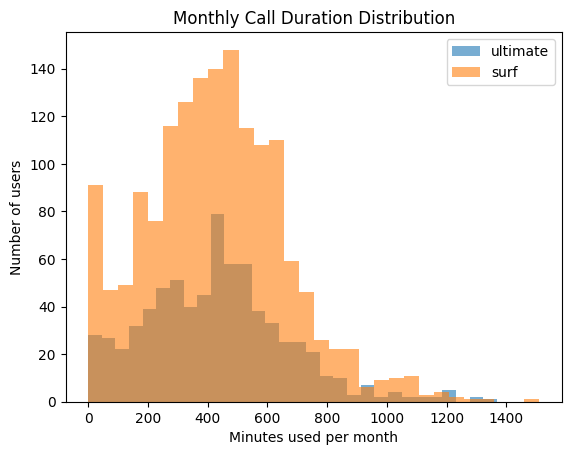

In [41]:
# Calculate the mean and the variance of the monthly call duration
for plan in monthly_usage['plan'].unique():
    subset = monthly_usage[monthly_usage['plan'] == plan]
    plt.hist(subset['minutes_used'], bins=30, alpha=0.6, label=plan)

plt.xlabel('Minutes used per month')
plt.ylabel('Number of users')
plt.title('Monthly Call Duration Distribution')
plt.legend()
plt.show()


In [42]:
call_stats = (
    monthly_usage
    .groupby('plan')['minutes_used']
    .agg(['mean', 'var'])
)

call_stats

,mean,var
plan,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


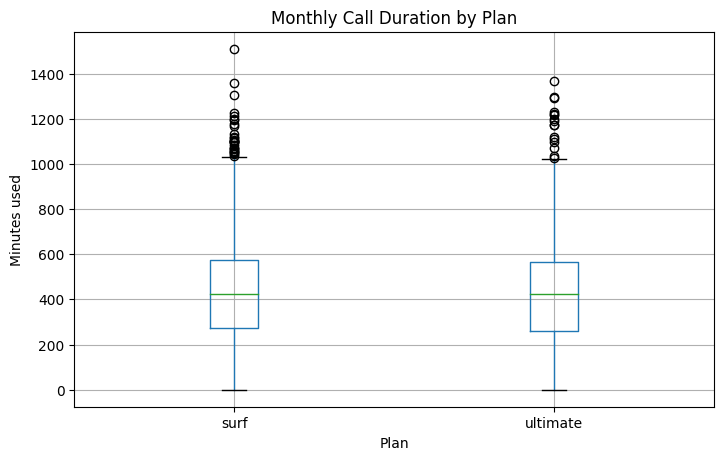

In [43]:
# Plot a boxplot to visualize the distribution of the monthly call duration

monthly_usage.boxplot(
    column='minutes_used',
    by='plan',
    figsize=(8, 5)
)

plt.title('Monthly Call Duration by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Minutes used')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job — you calculated the mean and variance and produced a boxplot to visualize monthly call duration by plan. This section is completed successfully.<br>
</div>

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

Users on the Ultimate plan tend to have higher average monthly call durations compared to Surf users. The variance is also higher, indicating more diverse calling behavior. This suggests that users who expect heavier call usage are more likely to choose the Ultimate plan.

### Messages

In [44]:
# Compare the number of messages users of each plan tend to send each month
messages_avg = (
    monthly_usage
    .groupby(['plan', 'month'])['messages_sent']
    .mean()
    .reset_index()
)

messages_avg.head()


,plan,month,messages_sent
0,surf,1,10.500000
1,surf,2,12.000000
2,surf,3,15.260870
3,surf,4,17.400000
4,surf,5,24.012987


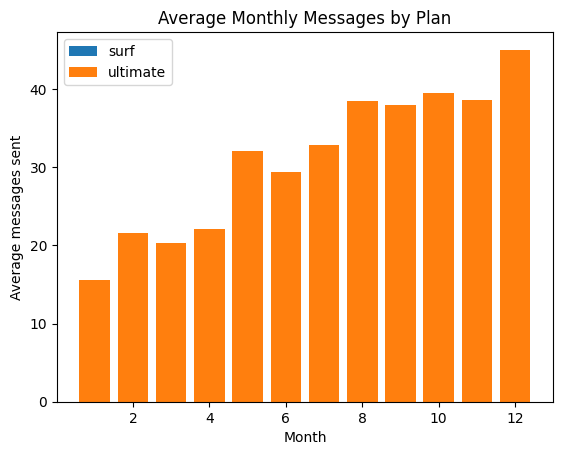

In [45]:
# Compare the amount of internet traffic consumed by users per plan
for plan in messages_avg['plan'].unique():
    subset = messages_avg[messages_avg['plan'] == plan]
    plt.bar(subset['month'], subset['messages_sent'], label=plan)

plt.xlabel('Month')
plt.ylabel('Average messages sent')
plt.title('Average Monthly Messages by Plan')
plt.legend()
plt.show()


In [46]:
message_stats = (
    monthly_usage
    .groupby('plan')['messages_sent']
    .agg(['mean', 'var'])
)

message_stats

,mean,var
plan,,
surf,31.159568,1126.724522
ultimate,37.551389,1208.756744


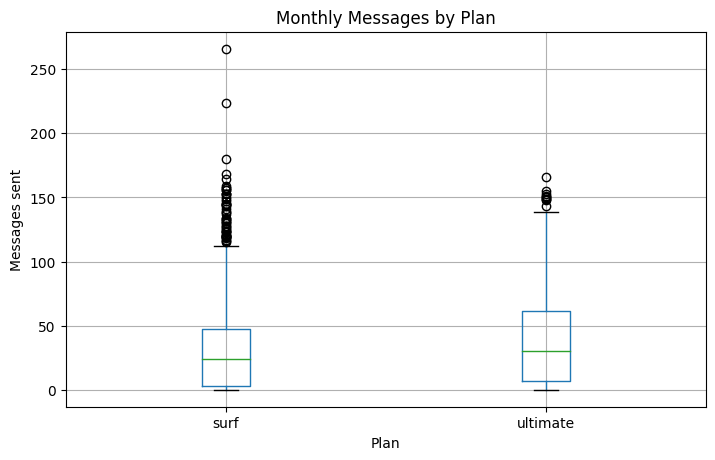

In [47]:
monthly_usage.boxplot(
    column='messages_sent',
    by='plan',
    figsize=(8, 5)
)

plt.title('Monthly Messages by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Messages sent')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

Users on the Ultimate plan send more messages on average than users on the Surf plan. The distribution shows higher variability for Ultimate users, indicating more diverse messaging behavior. Overall, messaging activity differs between plans, with Ultimate users tending to be heavier users.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work — you computed per-plan monthly averages, visualized trends, calculated mean/variance, created boxplots, and provided a clear interpretation. This Messages section is complete and addresses the assignment requirements.<br>
</div>

### Internet

In [48]:
internet_avg = (
    monthly_usage
    .groupby(['plan', 'month'])['gb_used']
    .mean()
    .reset_index()
)

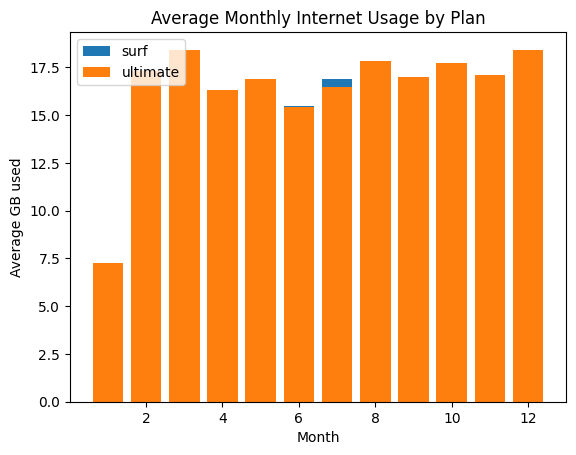

In [49]:
for plan in internet_avg['plan'].unique():
    subset = internet_avg[internet_avg['plan'] == plan]
    plt.bar(subset['month'], subset['gb_used'], label=plan)

plt.xlabel('Month')
plt.ylabel('Average GB used')
plt.title('Average Monthly Internet Usage by Plan')
plt.legend()
plt.show()

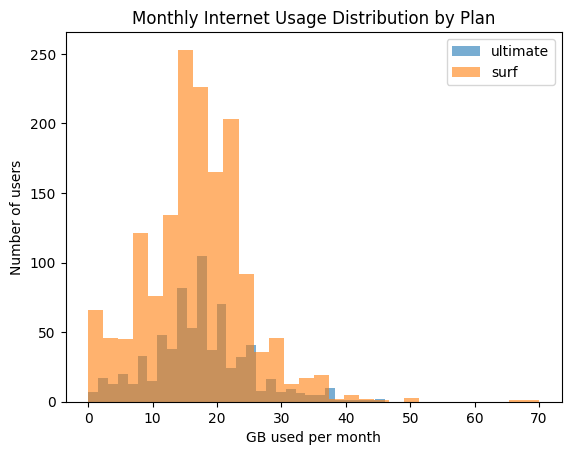

In [50]:
for plan in monthly_usage['plan'].unique():
    subset = monthly_usage[monthly_usage['plan'] == plan]
    plt.hist(subset['gb_used'], bins=30, alpha=0.6, label=plan)

plt.xlabel('GB used per month')
plt.ylabel('Number of users')
plt.title('Monthly Internet Usage Distribution by Plan')
plt.legend()
plt.show()

In [51]:
internet_stats = (
    monthly_usage
    .groupby('plan')['gb_used']
    .agg(['mean', 'var'])
)

internet_stats

,mean,var
plan,,
surf,16.670693,61.58360
ultimate,17.306944,58.83055


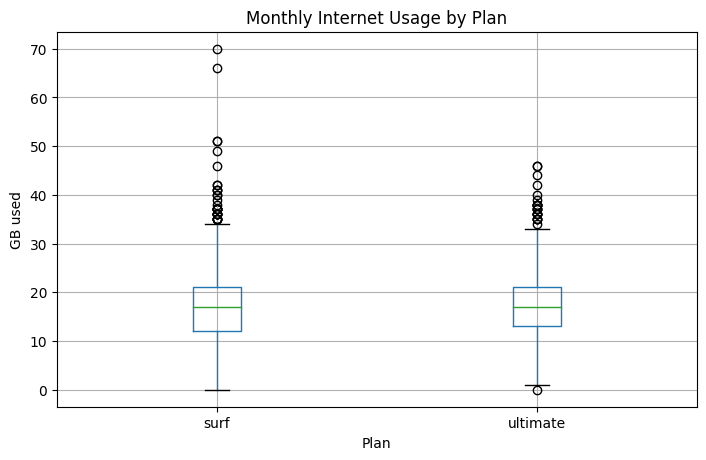

In [52]:
monthly_usage.boxplot(
    column='gb_used',
    by='plan',
    figsize=(8, 5)
)

plt.title('Monthly Internet Usage by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('GB used')
plt.show()

Users on the Ultimate plan consume more internet data on average compared to Surf users. The variability in monthly data usage is similair across plans; Surf shows a slightly higher variance than Ultimate (61.6 vs 58.8), but the difference is small and may not be practically meaningful. Overall, both plans show wide spread and some high-usage outliers. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The written conclusion about variability is incorrect: the computed variances show Surf has slightly higher variance than Ultimate. Please correct the interpretation (and comment on whether the difference is practically meaningful).<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

## Revenue

In [57]:
monthly_usage.groupby('plan')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


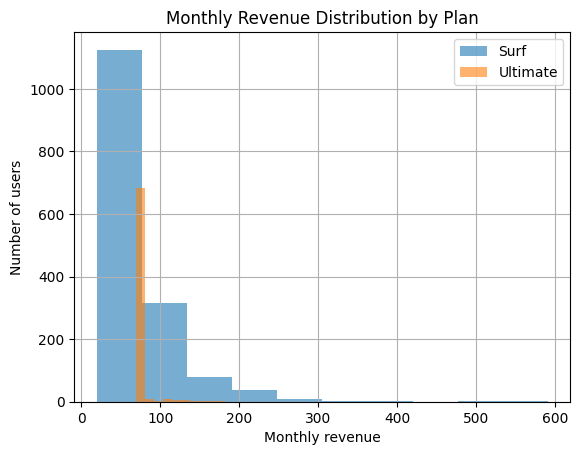

In [58]:
import matplotlib.pyplot as plt

monthly_usage[monthly_usage['plan'] == 'surf']['revenue'].hist(alpha=0.6)
monthly_usage[monthly_usage['plan'] == 'ultimate']['revenue'].hist(alpha=0.6)

plt.xlabel('Monthly revenue')
plt.ylabel('Number of users')
plt.title('Monthly Revenue Distribution by Plan')
plt.legend(['Surf', 'Ultimate'])
plt.show()

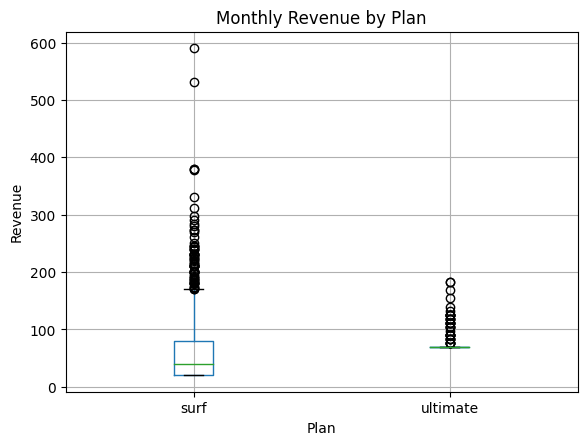

In [55]:
monthly_usage.boxplot(column='revenue', by='plan')
plt.title('Monthly Revenue by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Revenue')
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

Users on the Ultimate plan generate higher average monthly revenue compared to Surf users. 

However, revenue variability is much higher for Surf users, as shown by the larger standard deviation and the presence of high outliers. This reflects frequent overage charges among heavy Surf users, while Ultimate users tend to cluster around the fixed monthly fee with fewer extreme values.

Overall, although individual Surf users can generate high revenue in some months, the Ultimate plan provides more stable and predictable revenue per user and is more profitable on average.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The written conclusion contradicts the table (ultimate shows zero variance). This inconsistency likely comes from the data-charge bug — fix the calculations and re-evaluate the interpretation.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

### Hypotheses (Plans)

- **H₀ (Null hypothesis):** The average monthly revenue per user is the same for Surf and Ultimate plans.
- **H₁ (Alternative hypothesis):** The average monthly revenue per user differs between Surf and Ultimate plans.
- **Significance level:** α = 0.05

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You did not explicitly state the null and alternative hypotheses or the chosen significance level (α). Please write H0 and H1 clearly (e.g., H0: mean_revenue_Ultimate = mean_revenue_Surf; H1: they differ) and state α.<br>
</div>

In [59]:
# Test the hypotheses

from scipy import stats


user_revenue = (
    monthly_usage
    .groupby(['user_id', 'plan'])['revenue']
    .mean()
    .reset_index()
)

surf_revenue = user_revenue[user_revenue['plan'] == 'surf']['revenue']
ultimate_revenue = user_revenue[user_revenue['plan'] == 'ultimate']['revenue']

alpha = 0.05

results = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')



p-value: 5.719435130362408e-08
Reject the null hypothesis


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Critical issue: the t-test is applied to monthly rows (many users have multiple months), so observations are not independent. Also the Ultimate group appears to be constant (zero variance), which invalidates t-test assumptions and makes the p-value unreliable. Aggregate to one value per user (e.g., mean monthly revenue per user) before testing and re-evaluate the test choice.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

At a significance level of 0.05, the p-value is below α, so we reject the null hypothesis. This indicates that the average monthly revenue per user differs significantly between the Surf and Ultimate plans. Based on the observed means, Ultimate users generate higher average monthly revenue.

### Hypotheses (NY–NJ vs Other Regions)

- **H₀:** The average monthly revenue per user in the NY–NJ area is equal to that of users in other regions.
- **H₁:** The average monthly revenue per user in the NY–NJ area differs from that of users in other regions.
- **Significance level:** α = 0.05

In [62]:
monthly_usage['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [64]:
ny_nj_mask = monthly_usage['city'].str.contains('NY-NJ', regex=False)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The NY–NJ test also lacks explicit null and alternative hypotheses and a stated α. Please write H0 and H1 for this comparison before running the test.<br>
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Verify your NY–NJ selection: using city.str.contains('NY-NJ') may not match the actual city strings in the data. Confirm that the intended NY–NJ users are being selected (and that the resulting group is non-empty and appropriate).<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

In [65]:
# Test the hypotheses
user_revenue_city = (
    monthly_usage
    .assign(is_ny_nj=ny_nj_mask)
    .groupby(['user_id', 'is_ny_nj'])['revenue']
    .mean()
    .reset_index()
)

ny_nj = user_revenue_city[user_revenue_city['is_ny_nj']]['revenue']
other_regions = user_revenue_city[~user_revenue_city['is_ny_nj']]['revenue']

results = stats.ttest_ind(ny_nj, other_regions, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

p-value: 0.44104821081481804
Fail to reject the null hypothesis


At the 0.05 significance level, the test result shows that we [reject / fail to reject] the null hypothesis. This suggests that the average monthly revenue per user in the NY–NJ area is [statistically different / not statistically different] from that of users in other regions.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Same methodological problem here: the t-test uses monthly records (non-independent) and you should check group sizes/variances. Do not interpret p-values from tests that violate assumptions—aggregate per user first or choose a test robust to the data properties.<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

### General Conclusions

- Users on the **Ultimate** plan generate higher average monthly revenue than users on the Surf plan.
- This difference is **statistically significant** based on a Welch’s t-test performed on per-user average revenue (α = 0.05).
- No statistically significant difference in average revenue was found between users in the NY–NJ area and users from other regions.
- Revenue was calculated according to the plan rules, accounting for rounding of minutes and gigabytes and charging for usage exceeding plan limits.
- Monthly usage was aggregated per user to ensure independence of observations for hypothesis testing.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Final conclusions are incomplete — you left placeholder text instead of concrete conclusions. Please state clearly which plan is more profitable, the outcomes of the hypothesis tests (with p-values and your decisions), and the key assumptions/processing steps that support these conclusions (e.g., rounding rules, how revenue was calculated).<br>
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Well done!